### Machine learning Explainability approaches 

This notebook uses Kaggle's House Prices: Advanced regression (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) techniques to apply different explainability methods. 

The following will be explored: 

- Partial dependency plots (PDP)
- Indepedent conditional expectations (ICE)

.... later:  
    - Anchors
    - Data Shapley 
    
    
Refer to the other notebooks for other methods.

### Partial dependency plots 

Partial dependency plots (PDPs) are very intuitive. They show the average marginal change in a feature. They are also easy to plot, available in sklearn. They can help us establish, in a glance, whether a relationship between a feature and the target is linear, monotonic, or more complex.

**Advantages**:
- Easy to plot and interpret


**Disadvantages**:
- Limited to using no more than 2 features
- Assumes independce between features (correlation between them could result in unrealistic values)
- Shows only average marginal effect, heterogeneity is hidden

In [169]:
# Get the index of an example column
X.columns.get_loc('ExterQual_Gd')

67

In [170]:
# train a default RF model
rf = RandomForestRegressor(random_state=0, n_estimators=100).fit(X, y)

<Figure size 720x720 with 0 Axes>

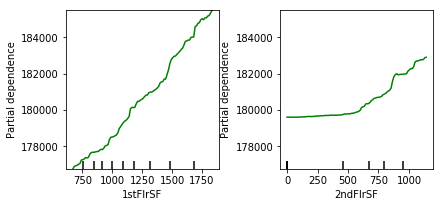

In [171]:
my_names = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond' , 'YearBuilt', 'YearRemodAdd' ,
            'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

plt.figure(figsize=(10, 10))
plot_partial_dependence(rf, 
                        X, #raw features data
                        features=['1stFlrSF', '2ndFlrSF'], #column we want to show
                        feature_names= my_names #labels on graph: need to define all names occuring before the name of interest
                         )  

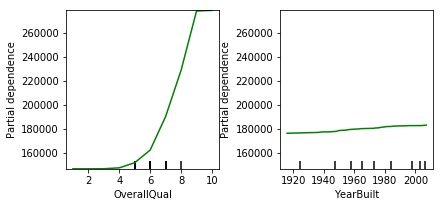

In [172]:
my_features = [5,8]
my_names=['YearBuilt', 'BsmtFinSF1']
plot_partial_dependence(rf, 
                        X, #raw features data
                        features= [3, 5]  ,
                        feature_names= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',  'YearBuilt']
                          )   

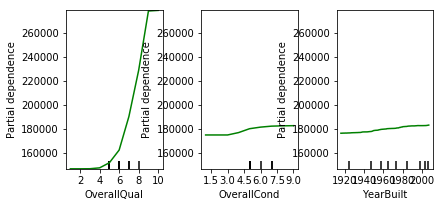

In [173]:
# Can also plot 3 features parallel to each other
plot_partial_dependence(rf, 
                        X, #raw features data
                        features= [3,4, 5]  ,
                        feature_names= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',  'YearBuilt']
                         )   

We can also plot 2 features on the same plot, i.e. interacting them.

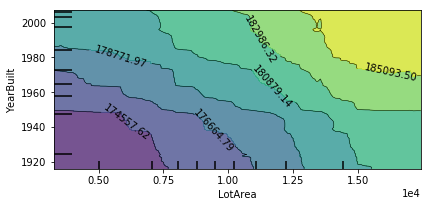

In [174]:
plot_partial_dependence(rf, 
                        X, #raw features data
                        features= [(2,5)]  ,
                        feature_names= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',  'YearBuilt']
                         )   

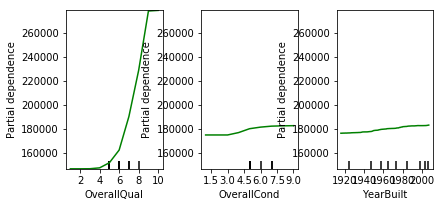

In [175]:
plot_partial_dependence(rf, 
                        X, #raw features data
                        features= [3,4, 5]  ,
                        feature_names= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',  'YearBuilt']
                         )   

### Individual Conditional Expectation (ICE) plots 

Individual conditional expectation (ICE) curves are very similar to PDP plots, but they also show heterogeneous effects. The main difference is that the ICE plots show one line per instance in the dataset. In a way, PDP plots show like an average of all ICE plots. 


**Advantages**:
- Even easier to interpret than PDP plots
- Cna uncover heterogenous effects

**Disadvantages**: 
- Can only display one feature meaningfully
- Again, they make an independence assumption 

Text(0.5,0,'OverallQual')

<Figure size 720x720 with 0 Axes>

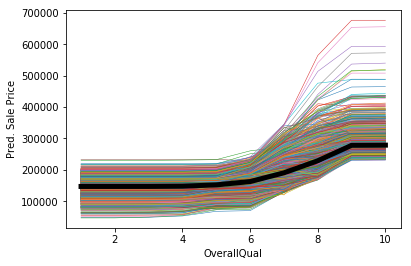

In [176]:
Quality_ice_df = ice(data=X, column='OverallQual', 
                   predict=rf.predict)

plt.figure(figsize=(10, 10))
cmap2 = plt.get_cmap('OrRd')
ice_plot(Quality_ice_df, linewidth=.5,  cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
 
plt.ylabel('Pred. Sale Price')
plt.xlabel('OverallQual')

We can also center the ICE curves, so that the level effects are removed (otherwise, they are a bit difficult to read since they start at different prediction levels). 

#### Centered ICE plots 

Text(0.5,0,'OverallQual')

<Figure size 720x720 with 0 Axes>

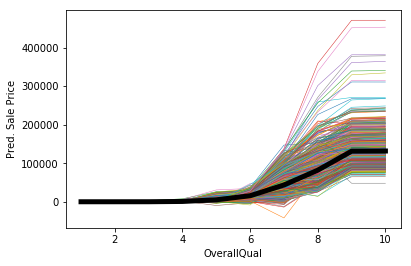

In [177]:
# There is an error in the __gen_quantiles() in the ice_plot, patch it below: 
import pycebox.ice as icebox
def __get_quantiles(x):
    return np.greater.outer(x, x).sum(axis=1) / x.size
icebox.__get_quantiles = __get_quantiles



plt.figure(figsize=(10, 10))
cmap2 = plt.get_cmap('OrRd') 
ice_plot(Quality_ice_df, linewidth=.5,  cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5}, centered=True)
 
plt.ylabel('Pred. Sale Price')
plt.xlabel('OverallQual')

Repeat the process with the YearBuilt feature.

Text(0.5,0,'YearBuilt')

<Figure size 720x720 with 0 Axes>

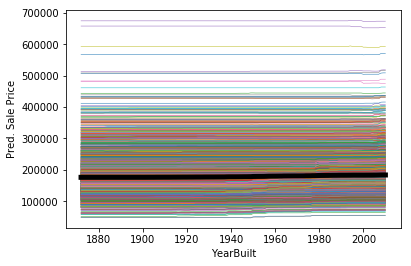

In [178]:
YearBuilt_ice_df = ice(data=X, column='YearBuilt', 
                   predict=rf.predict)

plt.figure(figsize=(10, 10))
cmap2 = plt.get_cmap('OrRd')
ice_plot(YearBuilt_ice_df, linewidth=.5,  cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
 
plt.ylabel('Pred. Sale Price')
plt.xlabel('YearBuilt')

Text(0.5,0,'YearBuilt')

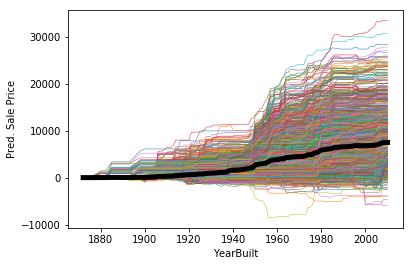

In [179]:
ice_plot(YearBuilt_ice_df, linewidth=.5,  cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5}, centered=True)
 
plt.ylabel('Pred. Sale Price')
plt.xlabel('YearBuilt')